In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('/Users/meenakshireghu/Downloads/Fraud.csv')

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [16]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [17]:
df.drop(columns=['step','nameOrig','nameDest','isFlaggedFraud'],inplace=True)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [18]:
df.shape

(6362620, 7)

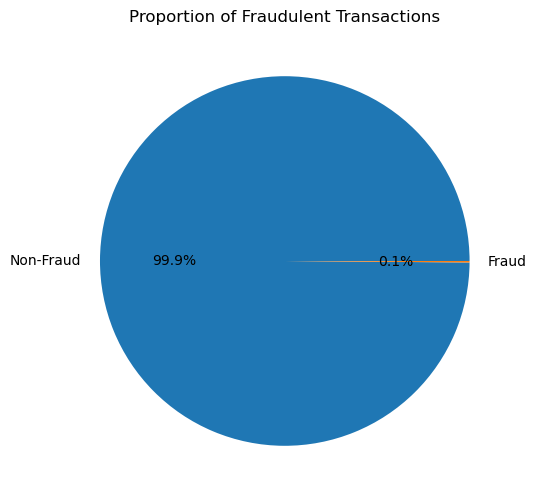

In [19]:
plt.figure(figsize=(6,6))
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Fraud', 'Fraud'])
plt.title('Proportion of Fraudulent Transactions')
plt.ylabel('') 
plt.show()

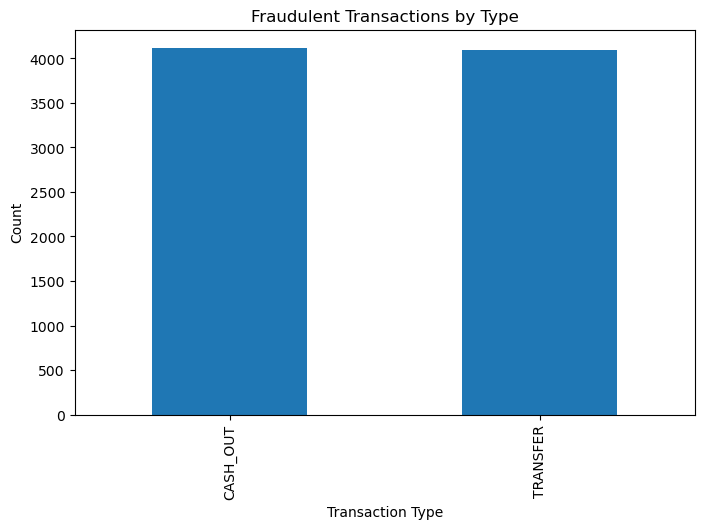

In [20]:
fraud_type = df[df['isFraud'] == 1]['type'].value_counts()
plt.figure(figsize=(8,5))
fraud_type.plot(kind='bar')
plt.title('Fraudulent Transactions by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

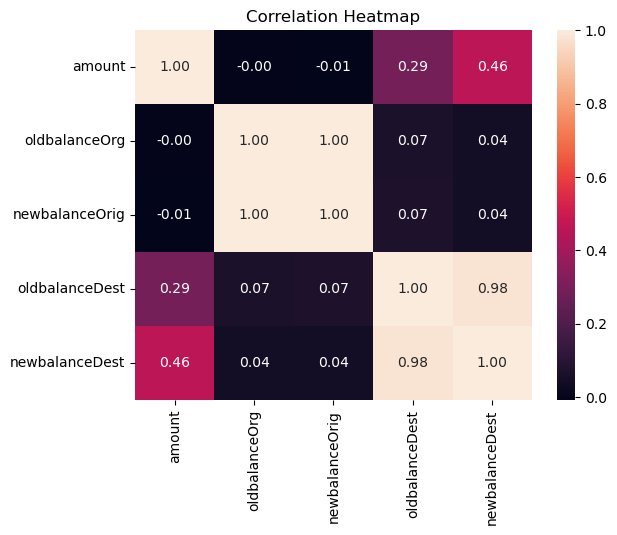

In [21]:
correlation_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [22]:
new_df=pd.get_dummies(df,drop_first=True)
new_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.0,160296.36,0.0,0.0,0,False,False,True,False
1,1864.28,21249.0,19384.72,0.0,0.0,0,False,False,True,False
2,181.00,181.0,0.00,0.0,0.0,1,False,False,False,True
3,181.00,181.0,0.00,21182.0,0.0,1,True,False,False,False
4,11668.14,41554.0,29885.86,0.0,0.0,0,False,False,True,False


In [23]:
new_df.shape

(6362620, 10)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
num_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

In [26]:
scaler = StandardScaler()
new_df[num_columns] = scaler.fit_transform(new_df[num_columns])

In [27]:
new_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,False,False,True,False
1,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,False,False,True,False
2,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,1,False,False,False,True
3,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,1,True,False,False,False
4,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,False,False,True,False


In [28]:
X=new_df.drop(columns=['isFraud'])
y=new_df['isFraud']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [32]:
model = LogisticRegression(max_iter=1000)  


In [33]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [34]:
y_pred = model.predict(X_test)

In [35]:
model_score=model.score(X_train,y_train)
print("Accuracy score of our model is :",model_score)
print("Confusion matrix is:\n",metrics.confusion_matrix(y_test,y_pred))
print("Classification report is:\n",metrics.classification_report(y_test,y_pred))
score=cross_val_score(model,X,y,cv=5)
mean_score_log=score.mean()
print("Mean of Cross validation score is: ",mean_score_log)

Accuracy score of our model is : 0.9991748682146663
Confusion matrix is:
 [[1906225      83]
 [   1483     995]]
Classification report is:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906308
           1       0.92      0.40      0.56      2478

    accuracy                           1.00   1908786
   macro avg       0.96      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

Mean of Cross validation score is:  0.9991313326899924


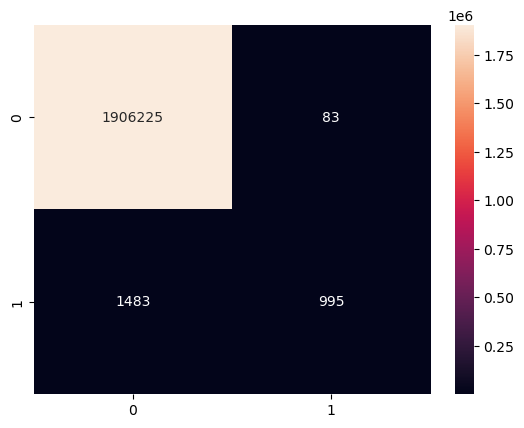

In [36]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.show()

In [37]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']  ,
    'gamma': ['scale', 'auto'],   
}

In [39]:
gsv = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv = 5, scoring = 'accuracy')

In [ ]:
gsv.fit(X_train,y_train)

In [ ]:
print("Best estimator is: ",gsv.best_estimator_)
print("Best parameters are: ",gsv.best_params_)
print("Best score is: ",gsv.best_score_)